-- use derivative grade function


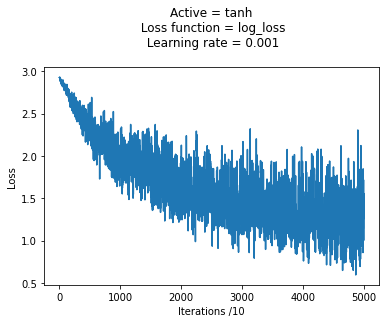

valid percent is : 86.45%
average loss is : 1.2944292199513705
d_w1 derivative:
[[ 8.90374373e-04  2.95422537e-04  3.63047630e-05  6.31603806e-06
   4.98406517e-07 -2.21057752e-07 -7.84173816e-07 -3.51054085e-06
  -2.21229642e-05  2.96178795e-06]
 [-7.32742796e-06 -2.43121031e-06 -2.98773801e-07 -5.19784882e-08
  -4.10168796e-09  1.81921762e-09  6.45343949e-09  2.88903588e-08
   1.82063221e-07 -2.43743401e-08]
 [-1.13134921e-04 -3.75376991e-05 -4.61304436e-06 -8.02543836e-07
  -6.33297447e-08  2.80885793e-08  9.96406064e-08  4.46064905e-07
   2.81104205e-06 -3.76337925e-07]
 [-1.64240198e-04 -5.44942190e-05 -6.69684759e-06 -1.16506873e-06
  -9.19370409e-08  4.07767452e-08  1.44650236e-07  6.47561231e-07
   4.08084525e-06 -5.46337198e-07]
 [-3.86242877e-05 -1.28153790e-05 -1.57489440e-06 -2.73988648e-07
  -2.16207893e-08  9.58944738e-09  3.40173257e-08  1.52286660e-07
   9.59690395e-07 -1.28481853e-07]
 [-1.96492943e-04 -6.51955462e-05 -8.01194411e-06 -1.39385964e-06
  -1.09991219e-07  

In [ ]:
import ann
import imp
imp.reload(ann)